## This script contains the following points:

### 1. Importing Visualization Libraries and Data
### 2. Exploring Relationships - Main Dataframe
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots and Bar Charts
### 3. Exploring Relationships - Subset Dataframe (Customers with 0 income)
### 4. Defining Objectives and Hypothesis 
### 5. Exporting Visuals and Data

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.3.4'

In [3]:
# This option ensures the charts are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Define path
path = r'C:\Users\senja\OneDrive\Documents\5. Learning\6. Data Analytics Immersion\WATSON'

In [5]:
path

'C:\\Users\\senja\\OneDrive\\Documents\\5. Learning\\6. Data Analytics Immersion\\WATSON'

In [6]:
# Import data
df = pd.read_excel(os.path.join(path, '02. Data\WA_Customers.xlsx'))

In [7]:
# Import data
df_no_income = pd.read_excel(os.path.join(path, '02. Data\WA_Customers_no_income.xlsx'))

### 2. Exploring Relationships - Main Dataframe

In [8]:
df.head()

,Customer ID,State,Location Code,Customer Lifetime Value,Coverage,Education,Employment Status,Gender,Income,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,Suburban,2763.519279,Basic,Bachelor,Employed,F,56274,Married,69,32,5,0,1,Corporate Auto,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,Suburban,6979.535903,Extended,Bachelor,Unemployed,F,0,Single,94,13,42,0,8,Personal Auto,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,Suburban,12887.431650,Premium,Bachelor,Employed,F,48767,Married,108,18,38,0,2,Personal Auto,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,Suburban,7645.861827,Basic,Bachelor,Unemployed,M,0,Married,106,18,65,0,7,Corporate Auto,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,Rural,2813.692575,Basic,Bachelor,Employed,M,43836,Single,73,12,44,0,1,Personal Auto,Agent,138.130879,Four-Door Car,Medsize


### Correlations

In [9]:
# Create a correlation matrix using pandas
df.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


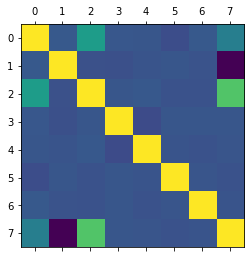

In [10]:
# Create a correlation heatmap using matplotlib
plt.matshow(df.corr())
plt.show()

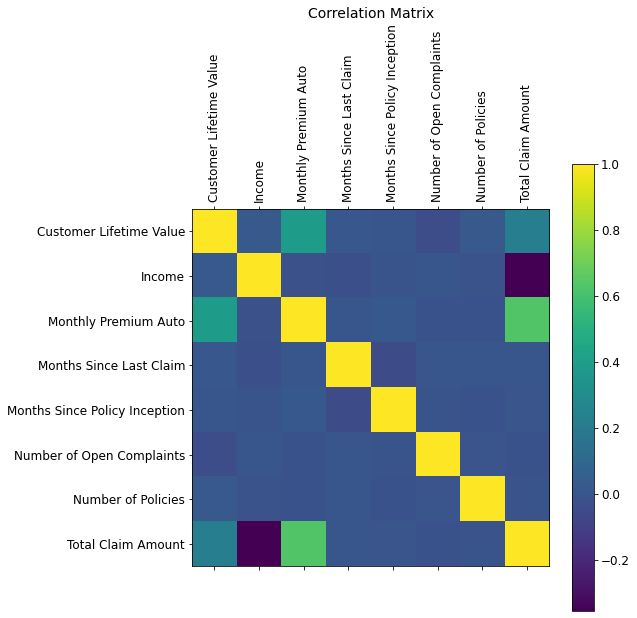

In [11]:
# Add labels, a legend, and change the size of the heatmap
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=12, rotation=90) # x axis labels
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=12) # add font size
plt.title('Correlation Matrix', fontsize=14); # add title

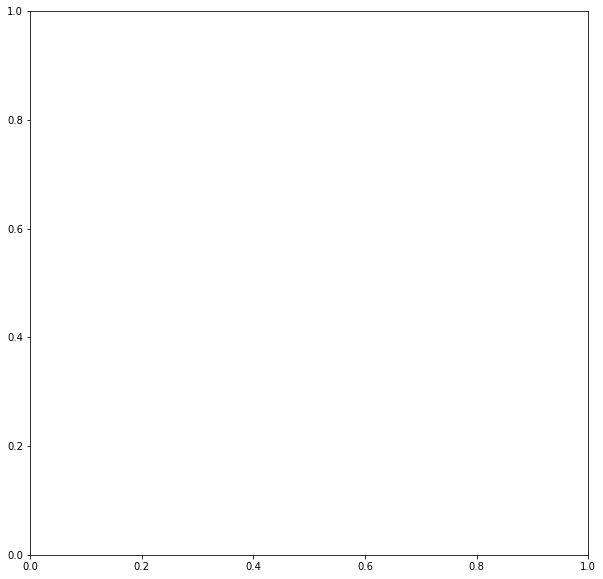

In [12]:
# Create a subplot with matplotlib. It creates an empty output, but this is just to show the subplots.
f,ax = plt.subplots(figsize=(10,10))

In [13]:
# Create a subset including only numeric variables
sub = df[['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies' ,'Total Claim Amount']]

In [14]:
sub

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [15]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

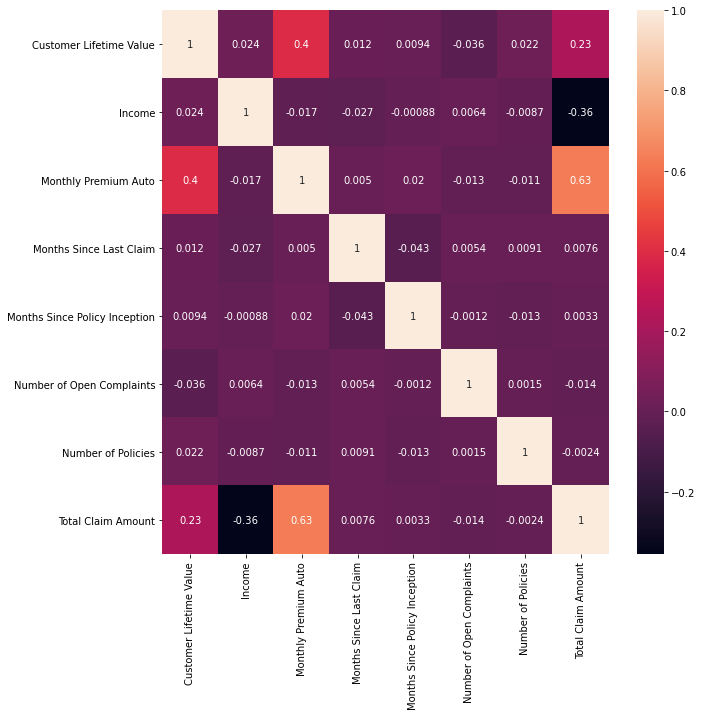

In [16]:
corr.figure

#### Above correlation heatmap shows;

   - The strongest positive correlation is between monthly premium auto (=the amount customers pay monthly) and the total claim amount. A 0.63 coefficient indicates that when the claim amount increases a monthly insurance payment also increases. This is expected as the monthly payment usually increases if a customer raises any claims due to accident or so. Note: There were no actual data available on how many claims or what type of claims the customers have made. 
    
   - There is a medium negative correlation between income and the number of claims; A -0.36 coefficient indicates that the customers with lower incomes had the higher claims amounts as well. However the reason for this could be due to missing data, approx. 40% of customers have either not told their income or do not have income (as income showing 0). In addition, some customers might have not provided the correct income.
   
   - A 0.40 coefficient indicates a medium positive correlation between monthly premium auto payment and customer lifetime value. This indicates that the most valuable customers also pay monthly more.


### Scatterplots

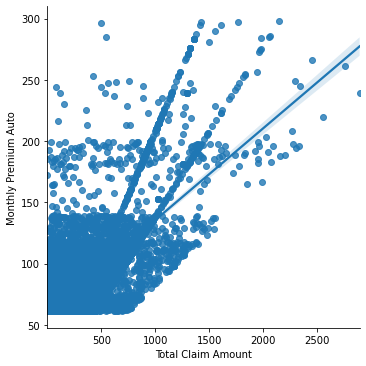

In [17]:
# Create a scatterplot for the total claim amount and monthly payment

sns.lmplot(x = 'Total Claim Amount', y = 'Monthly Premium Auto', data = df)

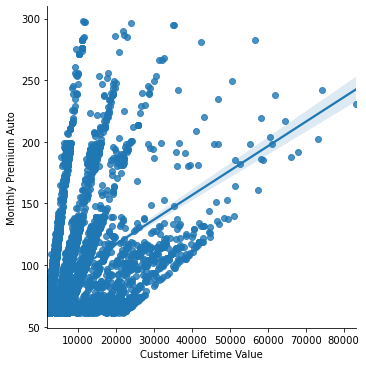

In [18]:
# Create a scatterplot for the customer lifetime value and monthly payment

sns.lmplot(x = 'Customer Lifetime Value', y = 'Monthly Premium Auto', data = df)

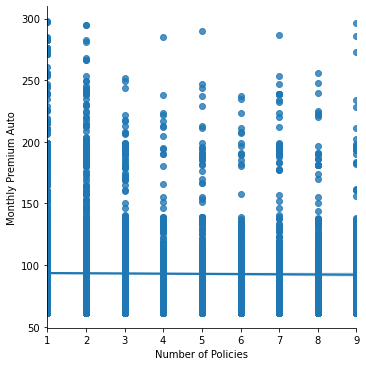

In [19]:
# Create a scatterplot for the customer lifetime value and monthly payment

sns.lmplot(x = 'Number of Policies', y = 'Monthly Premium Auto', data = df)

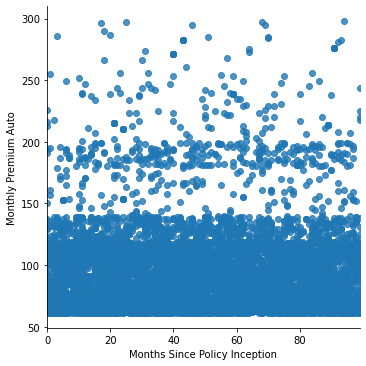

In [20]:
# Create a scatterplot for the customer lifetime value and monthly payment

sns.lmplot(x = 'Months Since Policy Inception', y = 'Monthly Premium Auto', data = df)

### Pair Plots

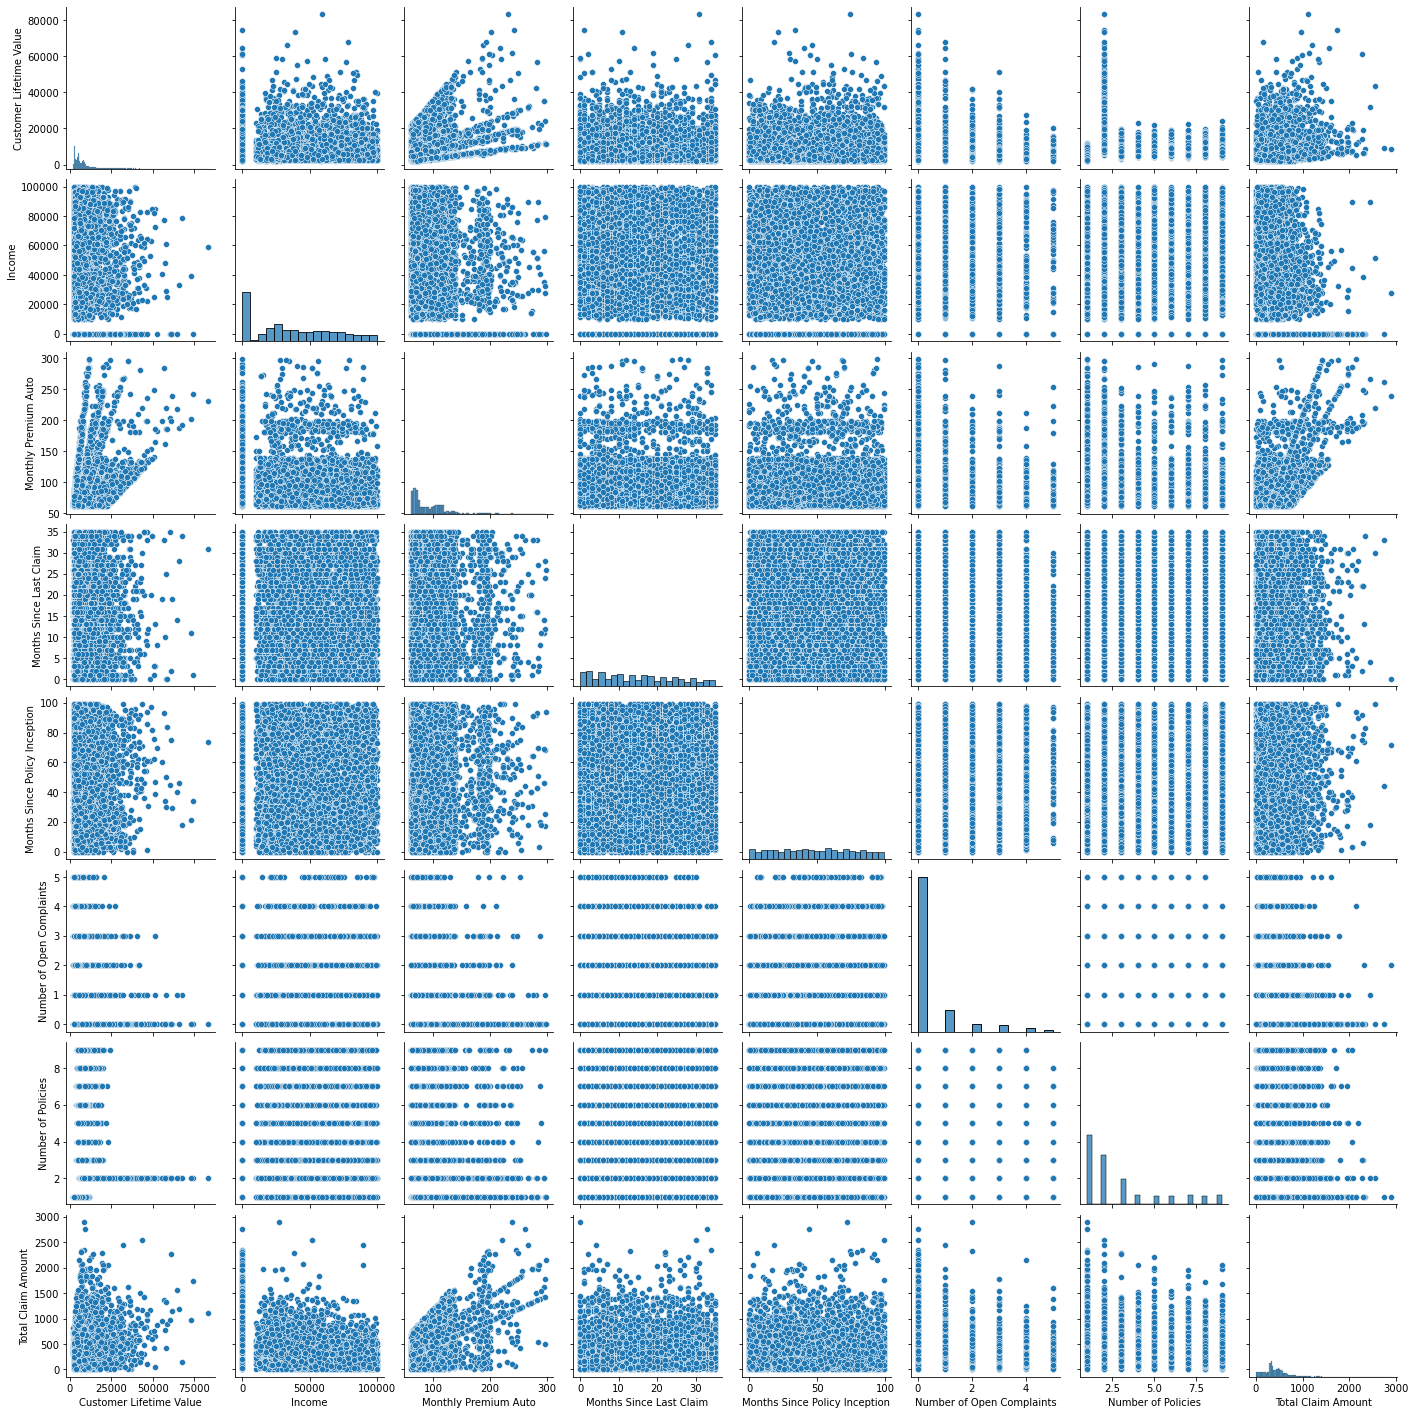

In [21]:
# Create a pair plot for entire dataframe
g = sns.pairplot(df)

In [22]:
# select the variables for the pair plot
sub_2 = sub[['Monthly Premium Auto', 'Income', 'Total Claim Amount', 'Customer Lifetime Value']]

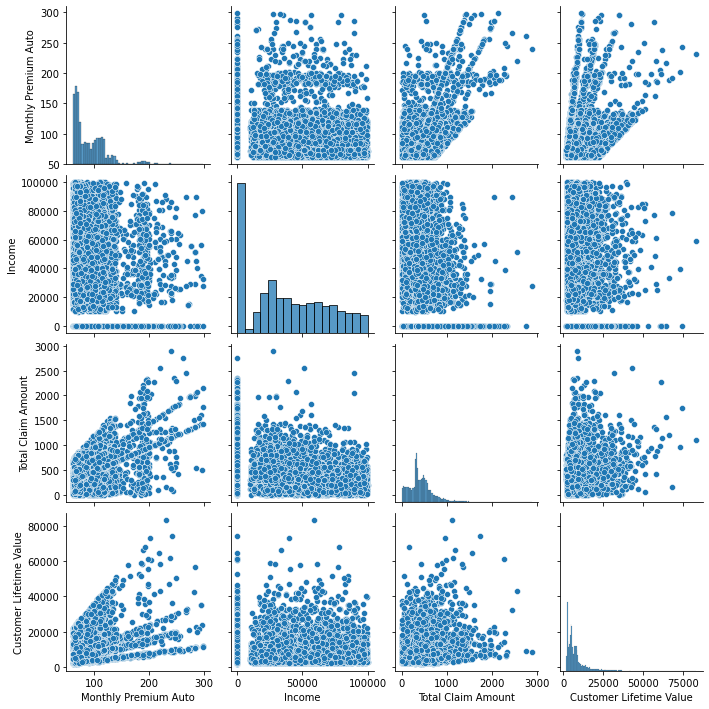

In [23]:
# Create a pair plot 
g = sns.pairplot(sub_2)

#### Above Scatterplots and Pair Plots;
  
   - I have selected those variables into the pair plot which showed strong or moderate correlations 
   - The monthly premium auto (=the amount customers pay monthly) and the total claim amount relationship plot shows that the most of the claims are under 800 when the customer's monthly premium is under 150. Although there is a positive trend the plot also demonstrates that the data is widely spread.
    
   - The income pair plots confirm the weak correlation and shows the customers’ incomes are spread as well. The plot also shows that there are not any significant trends.
   
   - The relationship between monthly premium auto and customer lifetime value confirms the correlation results and shows the moderately positive trends but it also shows that data is spread on this plot.


### Categorical Plots and Bar Charts

In [24]:
df.describe(include='all')

,Customer ID,State,Location Code,Customer Lifetime Value,Coverage,Education,Employment Status,Gender,Income,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134,9134,9134.000000,9134,9134
unique,9134,5,3,NaN,3,5,5,2,NaN,3,NaN,NaN,NaN,NaN,NaN,3,4,NaN,6,3
top,DS32060,California,Suburban,NaN,Basic,Bachelor,Employed,F,NaN,Married,NaN,NaN,NaN,NaN,NaN,Personal Auto,Agent,NaN,Four-Door Car,Medsize
freq,1,3150,5779,NaN,5568,2748,5698,4658,NaN,5298,NaN,NaN,NaN,NaN,NaN,6788,3477,NaN,4621,6424
mean,NaN,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,37657.380009,NaN,93.219291,15.097000,48.064594,0.384388,2.966170,NaN,NaN,434.088794,NaN,NaN
std,NaN,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,30379.904734,NaN,34.407967,10.073257,27.905991,0.910384,2.390182,NaN,NaN,290.500092,NaN,NaN
min,NaN,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,0.000000,NaN,61.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,0.099007,NaN,NaN
25%,NaN,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,0.000000,NaN,68.000000,6.000000,24.000000,0.000000,1.000000,NaN,NaN,272.258244,NaN,NaN
50%,NaN,NaN,NaN,5780.182197,NaN,NaN,NaN,NaN,33889.500000,NaN,83.000000,14.000000,48.000000,0.000000,2.000000,NaN,NaN,383.945434,NaN,NaN
75%,NaN,NaN,NaN,8962.167041,NaN,NaN,NaN,NaN,62320.000000,NaN,109.000000,23.000000,71.000000,0.000000,4.000000,NaN,NaN,547.514839,NaN,NaN


<AxesSubplot:>

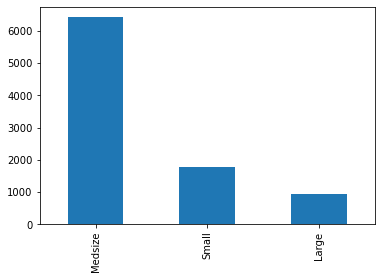

In [25]:
#create the bar chart to visualise the vehicle size distribution 
df['Vehicle Size'].value_counts().plot.bar()

<AxesSubplot:>

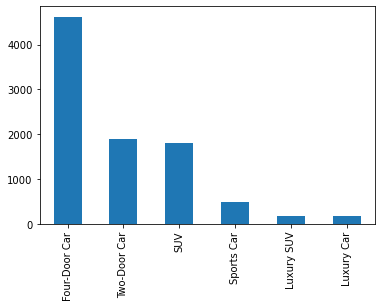

In [26]:
#create the bar chart to visualise the vehicle class distribution 
df['Vehicle Class'].value_counts().plot.bar()

<AxesSubplot:>

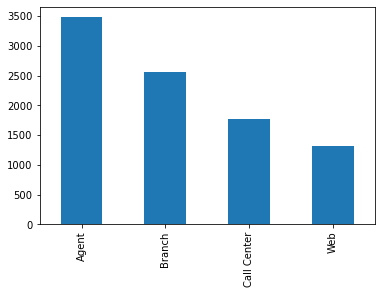

In [27]:
#create the bar chart to visualise the sale type distribution
df['Sales Channel'].value_counts().plot.bar()

<AxesSubplot:>

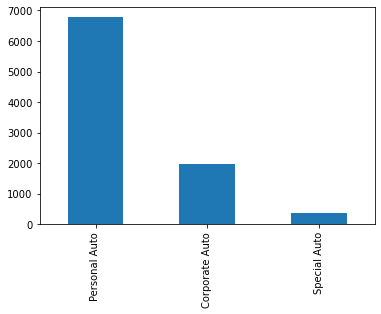

In [28]:
#create the bar chart to visualise the policy types
df['Policy Type'].value_counts().plot.bar()

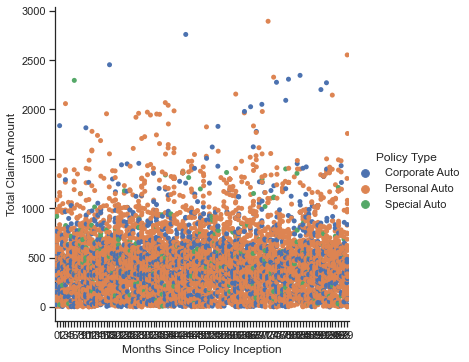

In [29]:
#create a categorical plot in seaborn using the policy type
sns.set(style="ticks")
g = sns.catplot(x="Months Since Policy Inception", y="Total Claim Amount", hue="Policy Type", data=df)



#### Above Categorical Plot;
  
   - This plot shows that the length of the policies varies, and there are no trends between policy types, claim amounts and the months since the last policy started.   

### 3. Exploring Relationships - Subset Dataframe (Customers with 0 income)

#### Clean the data 

In [30]:
#check for the data
df_no_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6817 entries, 0 to 6816
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     6817 non-null   int64  
 1   Customer ID                    6817 non-null   object 
 2   State                          6817 non-null   object 
 3   Location Code                  6817 non-null   object 
 4   Customer Lifetime Value        6817 non-null   float64
 5   Coverage                       6817 non-null   object 
 6   Education                      6817 non-null   object 
 7   Employment Status              6817 non-null   object 
 8   Gender                         6817 non-null   object 
 9   Income                         6817 non-null   int64  
 10  Marital Status                 6817 non-null   object 
 11  Monthly Premium Auto           6817 non-null   int64  
 12  Months Since Last Claim        6817 non-null   i

In [31]:
#check for columns
df_no_income.columns

Index(['Unnamed: 0', 'Customer ID', 'State', 'Location Code',
       'Customer Lifetime Value', 'Coverage', 'Education', 'Employment Status',
       'Gender', 'Income', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [32]:
#remove the unnamed column
df_no_income.drop(columns = ['Unnamed: 0'], inplace = True)

In [33]:
#check for columns
df_no_income.columns

Index(['Customer ID', 'State', 'Location Code', 'Customer Lifetime Value',
       'Coverage', 'Education', 'Employment Status', 'Gender', 'Income',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Sales Channel',
       'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [34]:
# Create a correlation matrix for no_income df using pandas
df_no_income.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.002915,0.399491,0.018531,0.011275,-0.025038,0.022683,0.245464
Income,0.002915,1.000000,-0.012372,-0.034453,0.015799,0.016642,-0.001324,-0.221879
Monthly Premium Auto,0.399491,-0.012372,1.000000,0.005887,0.020112,-0.006476,-0.026795,0.636084
Months Since Last Claim,0.018531,-0.034453,0.005887,1.000000,-0.039993,0.007744,0.017022,0.001460
Months Since Policy Inception,0.011275,0.015799,0.020112,-0.039993,1.000000,0.005763,-0.020548,-0.003733
Number of Open Complaints,-0.025038,0.016642,-0.006476,0.007744,0.005763,1.000000,0.010004,-0.011664
Number of Policies,0.022683,-0.001324,-0.026795,0.017022,-0.020548,0.010004,1.000000,-0.012253
Total Claim Amount,0.245464,-0.221879,0.636084,0.001460,-0.003733,-0.011664,-0.012253,1.000000


In [35]:
df.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


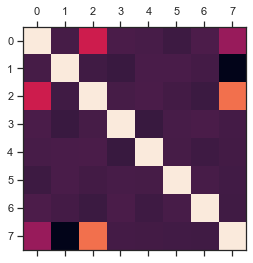

In [36]:
# Create a correlation heatmap using matplotlib
plt.matshow(df_no_income.corr())
plt.show()

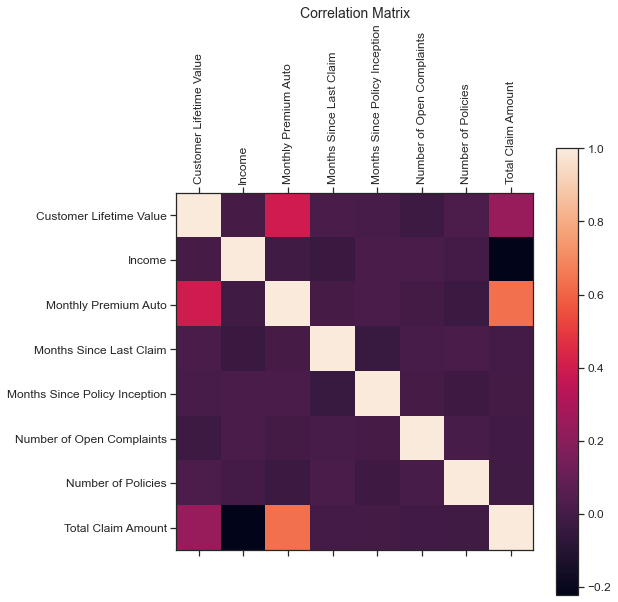

In [37]:
# Add labels, a legend, and change the size of the heatmap
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_no_income.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_no_income.select_dtypes(['number']).shape[1]), df_no_income.select_dtypes(['number']).columns, fontsize=12, rotation=90) # x axis labels
plt.yticks(range(df_no_income.select_dtypes(['number']).shape[1]), df_no_income.select_dtypes(['number']).columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=12) # add font size
plt.title('Correlation Matrix', fontsize=14); # add title

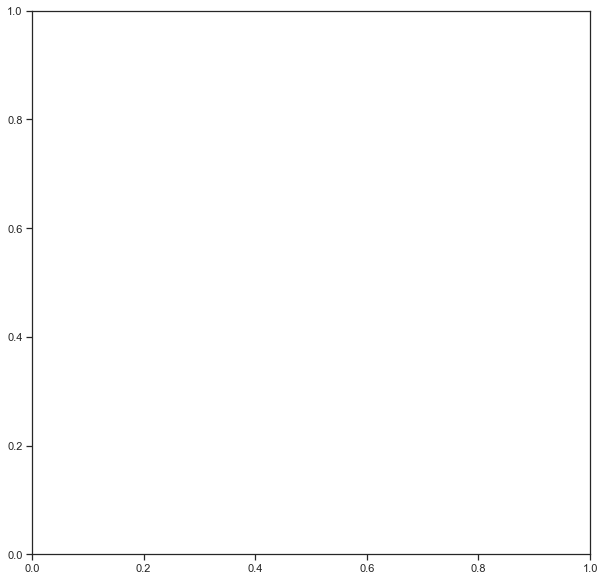

In [38]:
# Create a subplot with matplotlib. It creates an empty output, but this is just to show the subplots.

f,ax = plt.subplots(figsize=(10,10))

In [39]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr2 = sns.heatmap(df_no_income.corr(), annot = True, ax = ax)

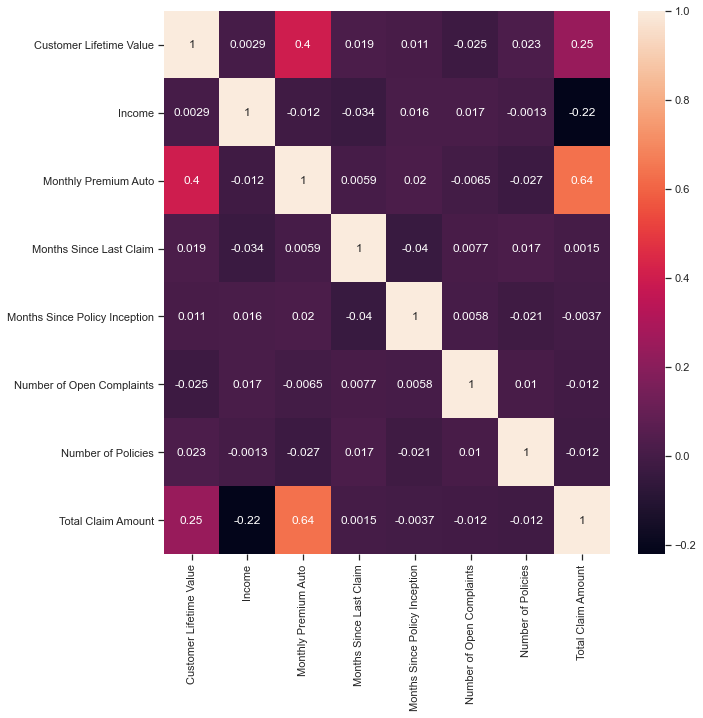

In [40]:
corr2.figure

- a subset analysis;  A coefficient number dropped from -0.36 to -0.22 when the customers with income 0 removed, indicating weak negative correlation between the lower incomes and the higher claim amounts. Hence, the income itself is not a good variable to explain the relationship. 

### 4. Defining Objective and Hypothesis 

#### Objective
-  As shown above the strongest relationship is between the monthly premium auto payment and the total claim amount variables (0.63 coefficient). My new aim is to find out to what extend the claim amounts would explain the monthly premium auto payments. 


#### Hypothesis
- "If the customers’ total claim amount is high then the monthly premium auto payment is also high” 


### 5. Exporting Visuals and Data

In [41]:
df_no_income.to_excel(os.path.join(path, '02. Data', 'WA_Customers_no_income.xlsx'))

In [42]:
g.savefig(os.path.join(path, '04. Analysis','Visualisations','output.png'))

In [43]:
corr.figure.savefig(os.path.join(path, '04. Analysis','Visualisations','output2.png'))